In [5]:
import torch, warnings, torchvision, os, h5py, time
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, utils, datasets
from torch.utils.data import DataLoader, Dataset, sampler, SubsetRandomSampler, TensorDataset
import torch.backends.cudnn as cudnn
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [6]:
# opening h5 files
ROOT_DIR = "/home/nikunjlad"
hf = h5py.File(os.path.join(ROOT_DIR,"data/cifar-10/cifar10.h5"), 'r')

In [7]:
hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'y_test', 'y_train']>

In [22]:
# train, test data with labels being converted to numpy array from HDF5 format
x_train = np.array(hf.get("X_train"), dtype=np.float32)
y_train = np.array(hf.get("y_train"), dtype=np.int64)
x_test = np.array(hf.get("X_test"), dtype=np.float32)
y_test = np.array(hf.get("y_test"), dtype=np.int64)
x_train_tr = np.array(hf.get("X_train"), dtype=np.int8).transpose(0,3,1,2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


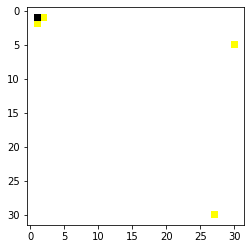

In [24]:
plt.imshow(x_train[0])

In [18]:
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)
x_test = torch.tensor(x_test)
y_test = torch.tensor(y_test)

In [2]:
m = nn.ConvTranspose2d(16, 33, 3, stride=2)
m

ConvTranspose2d(16, 33, kernel_size=(3, 3), stride=(2, 2))

In [3]:
m = nn.ConvTranspose2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
m

ConvTranspose2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2))

In [4]:
inp = torch.randn(20, 16, 50, 100)
type(inp)

torch.Tensor

In [16]:
output = m(inp)
output.shape

torch.Size([20, 33, 93, 100])